In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def gsmooth(DD,val,L,res=1):
    # DD is input date in decimal days (ususally since 1900,1,1)
    # val is values to be smoothed
    # L is length scale of gaussian kernel- larger widens the window
    # res can be changed to give a different resolution of output
    allt=np.arange(DD[0],DD[-1]+res,res)
    fil=np.empty(np.size(allt))
    s=L/2.355
    for ind,t in enumerate(allt):
        diff=[abs(x-t) for x in DD]
        weight=[np.exp(-.5*x**2/s**2) if x <= 3*L else 0.0 for x in diff]
        fil[ind]=np.sum(weight*val)/np.sum(weight)
    return allt,fil

In [6]:
def gsmooth(YD,val,L,res=1):
    # YD is input date in decimal year day
    # val is values to be smoothed
    # L is length scale of gaussian kernel- larger widens the window
    # res can be changed to give a different resolution of output
    allt=np.arange(0,366+res,res)
    fil=np.empty(np.size(allt))
    s=L/2.355
    for ind,t in enumerate(allt):
        diff=[min(abs(x-t),abs(x-t+365), abs(x-t-365)) for x in YD]
        weight=[np.exp(-.5*x**2/s**2) if x <= 3*L else 0.0 for x in diff]
        fil[ind]=np.sum(weight*val)/np.sum(weight)
    return allt,fil

In [17]:
t0=np.arange(0,450,.3)
t2=np.sin(t0*2*np.pi/365)+np.random.rand(len(t0))
x0,x2=gsmooth(t0,t2,15)

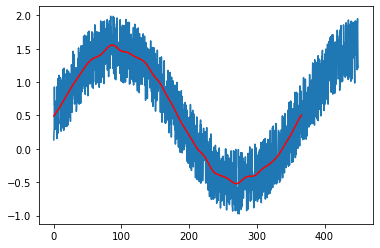

In [18]:
plt.plot(t0,t2)
plt.plot(x0,x2,'r-')